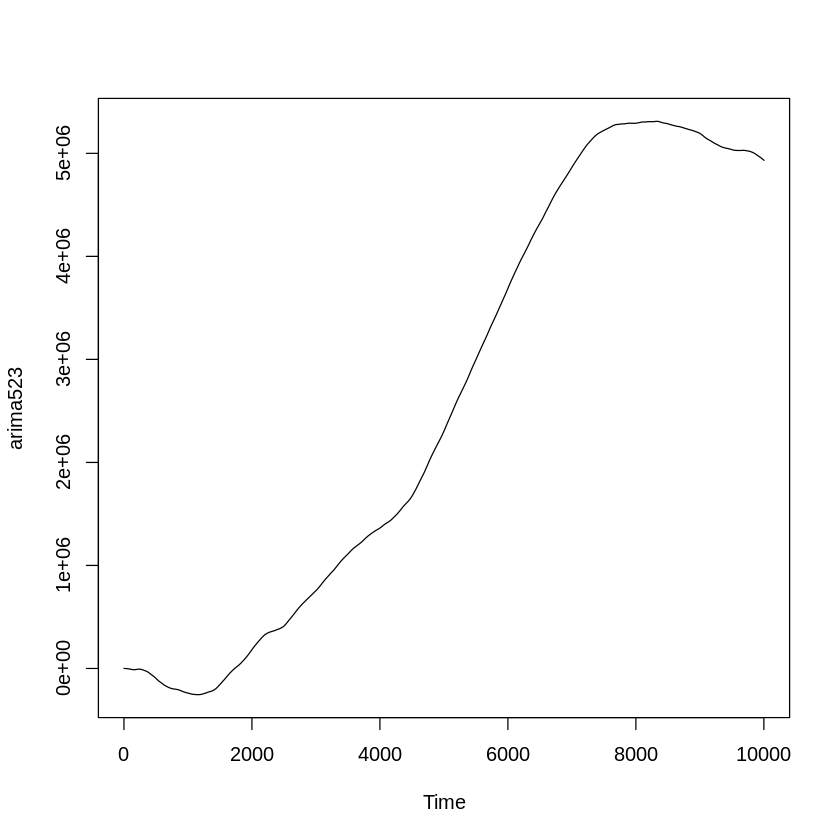

In [ ]:
arima523 <- arima.sim(n=10000, list(ar=c(0.2, 0.4, 0.1, 0.1, 0.1), ma=c(0.1, 0.2, 0.4), order=c(5,2,3))) #(p=5,d=2,q=3)
plot(arima523)

In [ ]:
#Instalar paquetes
install.packages('forecast')
install.packages("TSA")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quantmod’, ‘tseries’, ‘urca’, ‘RcppArmadillo’




In [ ]:
# Leer paquetes
library(forecast)
library(TSA)

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [ ]:
ndiffs(arima523) #Con o sin esta funcion queda el mismo numero de diferencias para que la serie sea estacionaria d=2

[1] 2

In [ ]:
diferencias <-ndiffs(arima523)
print(diferencias)

[1] 2


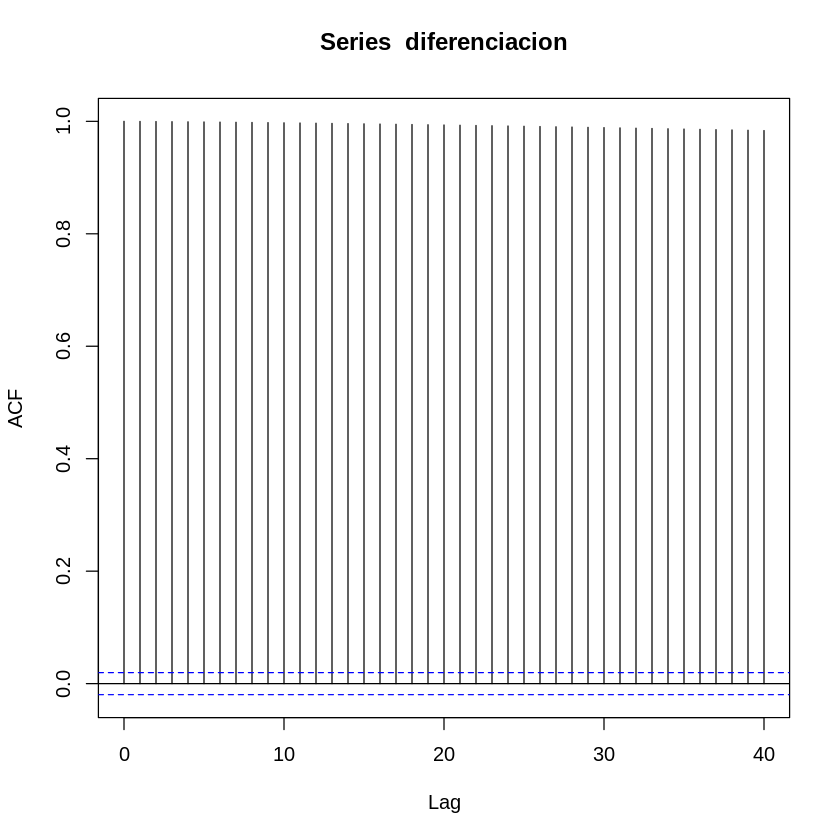

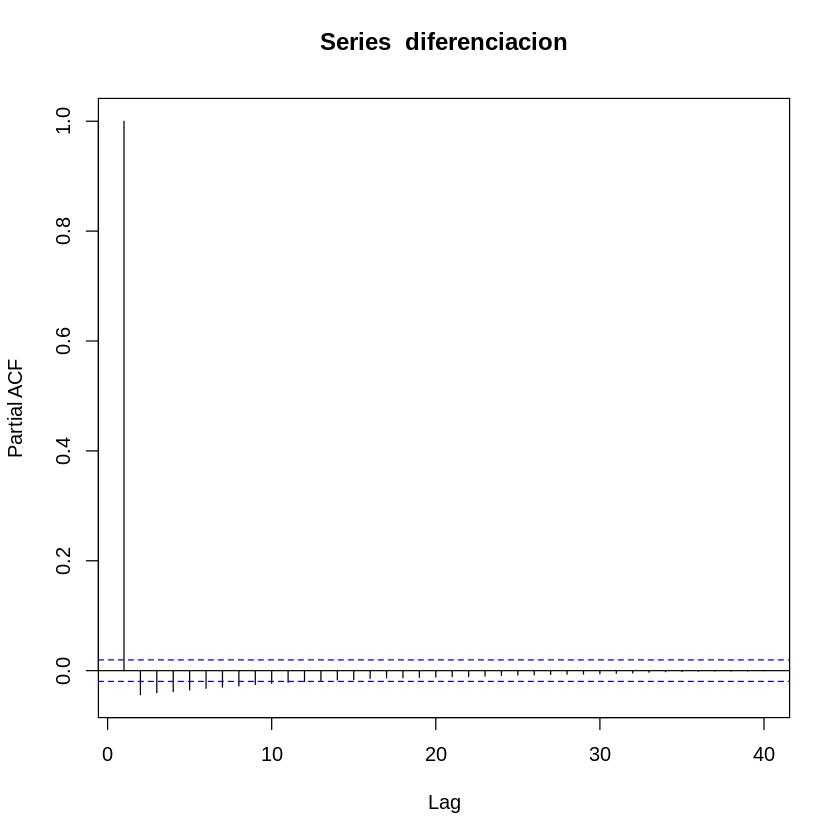

In [ ]:
#Calculo del orden de p y q 
diferenciacion <- diff(arima523, diferencias)
acf(diferenciacion) # Orden q
pacf(diferenciacion) # Orden p

#En la función de ACF hay muchos valores significativos (practicamente todos), ya que se salen de valor de significancia para poder rechazarlos, comparando con la Partial ACF , que solo nos muestra 1.

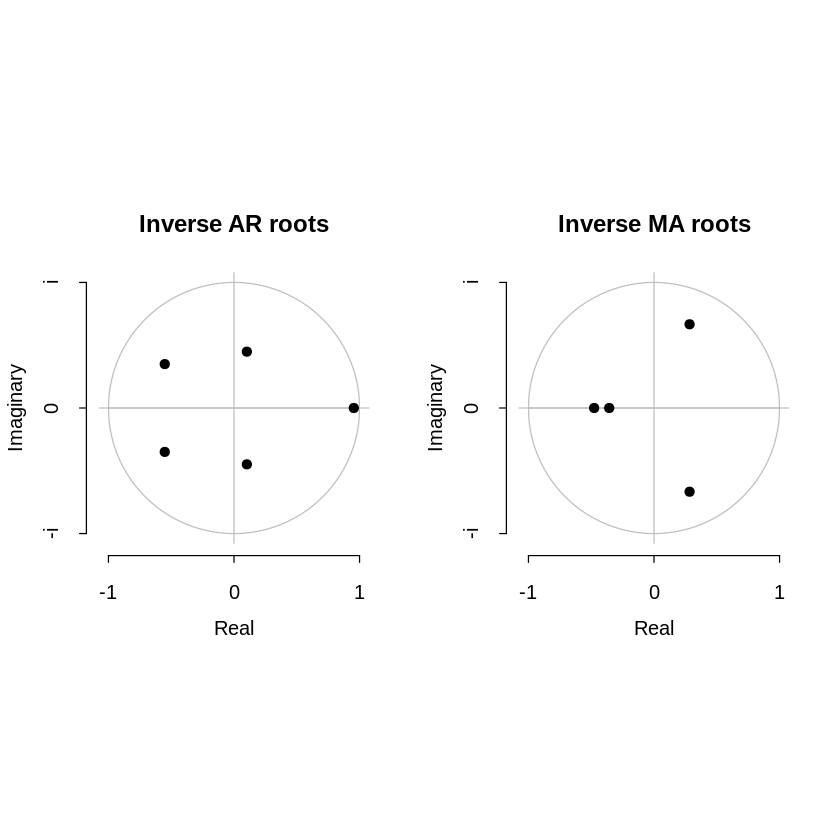

In [ ]:
plot(Arima(arima523, order = c(5, 2, 4))) 

In [ ]:
serie_arima <- Arima(arima523, order = c(5, 2, 4))

In [ ]:
serie_arima 

Series: arima523 
ARIMA(5,2,4) 

Coefficients:
         ar1     ar2     ar3     ar4     ar5     ma1     ma2     ma3     ma4
      0.0560  0.4447  0.2472  0.0493  0.0862  0.2669  0.2225  0.3413  0.0894
s.e.  0.3252  0.1085  0.1872  0.0580  0.0350  0.3255  0.0853  0.0393  0.1001

sigma^2 = 0.9984:  log likelihood = -14178.32
AIC=28376.64   AICc=28376.66   BIC=28448.75

In [ ]:
#Calculo de los criterios de Akaike y el criterio Bayesiano de Schwarz
AICARIMA_k <-matrix(0,nrow = 4,ncol = 4)
for(i in 0:3){
  for(j in 0:3){
    AICARIMA_k[i+1,j+1]<-AIC(Arima(arima523,order=c(i,2,j)))
  }
}
AICARIMA_k
AICARIMA_k==min(AICARIMA_k)

47136.69,41044.91,37845.29,34376.83
32794.32,30074.63,28555.95,28555.57
29526.00,29313.64,28556.44,28424.75
29107.93,28852.99,28461.80,28375.55


FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,TRUE


In [ ]:
AIC(Arima(arima523,order=c(2,2,3))) # Este es el menor con el criterio de Akaike

[1] 28424.75

In [ ]:
BICARIMA_k <- matrix(0,nrow = 4,ncol = 4)
for(i in 0:3){
  for(j in 0:3){
    BICARIMA_k[i+1,j+1] <-BIC(Arima(arima523,order=c(i,2,j)))
  }
}
BICARIMA_k
BICARIMA_k=min(BICARIMA_k)       

47143.90,41059.33,37866.92,34405.67
32808.74,30096.26,28584.79,28591.62
29547.63,29342.48,28592.49,28468.01
29136.77,28889.04,28505.06,28426.02


In [ ]:
BIC(Arima(arima523,order=c(3,2,3)))# Este es el menor con el criterio bayesiano de Schwarz

[1] 28426.02

In [ ]:
BIC(Arima(arima523,order=c(3,1,0)))

[1] 29558.73

      Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
10003        4931655 4931653 4931656 4931653 4931657
10004        4931125 4931122 4931128 4931120 4931130
10005        4930594 4930588 4930601 4930584 4930604
10006        4930062 4930051 4930073 4930045 4930079
10007        4929528 4929510 4929546 4929501 4929555
10008        4928993 4928967 4929019 4928953 4929033
10009        4928457 4928421 4928493 4928401 4928512
10010        4927919 4927871 4927968 4927845 4927993
10011        4927381 4927318 4927443 4927285 4927476
10012        4926841 4926763 4926920 4926721 4926961
10013        4926301 4926204 4926397 4926152 4926449
10014        4925759 4925642 4925876 4925580 4925938
10015        4925217 4925077 4925356 4925003 4925430
10016        4924674 4924509 4924838 4924422 4924925
10017        4924130 4923939 4924321 4923838 4924422
10018        4923585 4923365 4923805 4923249 4923921
10019        4923040 4922789 4923290 4922656 4923423
10020        4922494 4922210 4922778 4922060 4

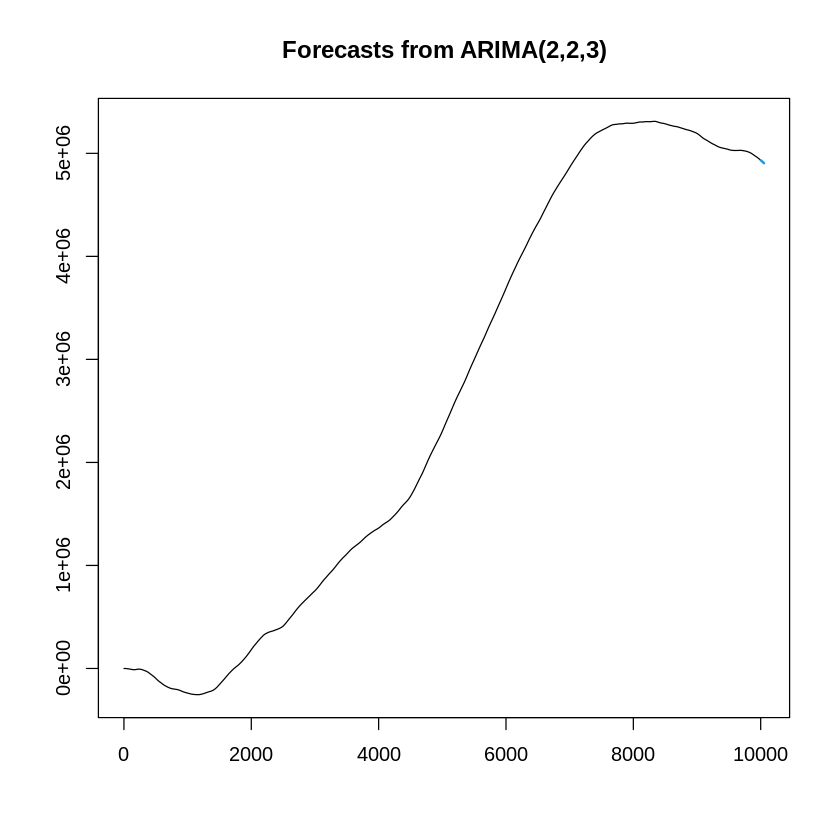

In [ ]:
#Modelo con el mejor AIC
forecast(Arima(arima523,order = c(2,2,3)),h=50)
plot(forecast(Arima(arima523,order=c(2,2,3)),h=50))

      Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
10003        4931655 4931653 4931656 4931653 4931657
10004        4931125 4931122 4931128 4931120 4931130
10005        4930594 4930588 4930601 4930584 4930604
10006        4930062 4930050 4930073 4930045 4930079
10007        4929528 4929510 4929545 4929501 4929554
10008        4928992 4928967 4929018 4928953 4929031
10009        4928456 4928420 4928491 4928402 4928510
10010        4927918 4927871 4927965 4927846 4927990
10011        4927379 4927318 4927439 4927286 4927471
10012        4926838 4926762 4926915 4926722 4926955
10013        4926297 4926203 4926391 4926153 4926441
10014        4925754 4925641 4925868 4925581 4925928
10015        4925211 4925076 4925346 4925004 4925418
10016        4924667 4924508 4924826 4924423 4924910
10017        4924122 4923937 4924307 4923839 4924405
10018        4923576 4923362 4923789 4923250 4923902
10019        4923029 4922786 4923272 4922657 4923401
10020        4922481 4922206 4922757 4922060 4

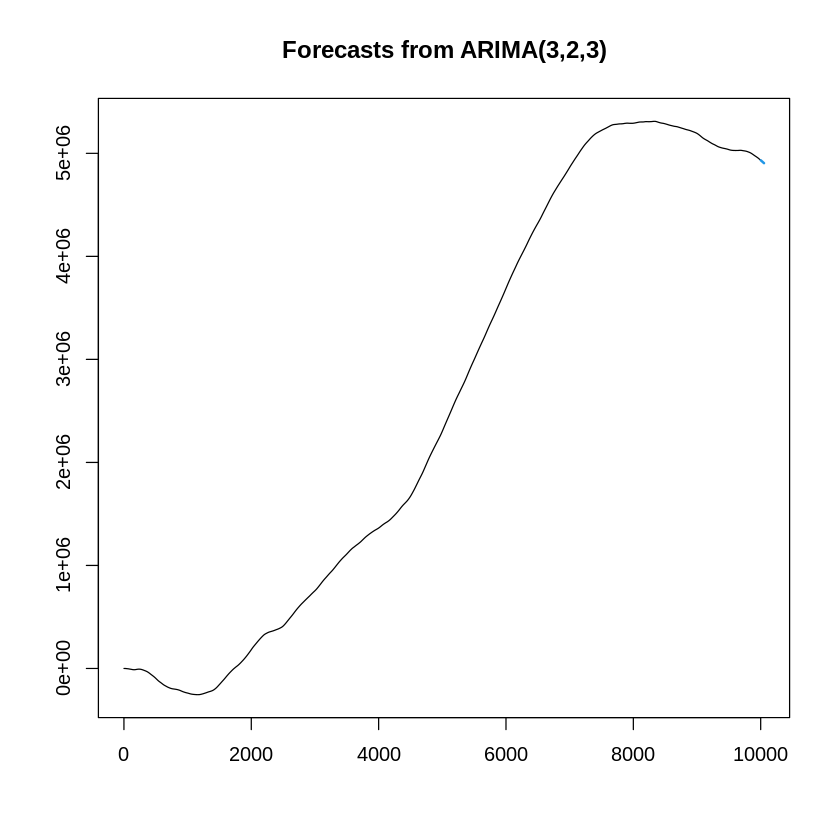

In [ ]:
#Modelo con el mejor BIC
forecast(Arima(arima523,order = c(3,2,3)),h=50)
plot(forecast(Arima(arima523,order=c(3,2,3)),h=50))

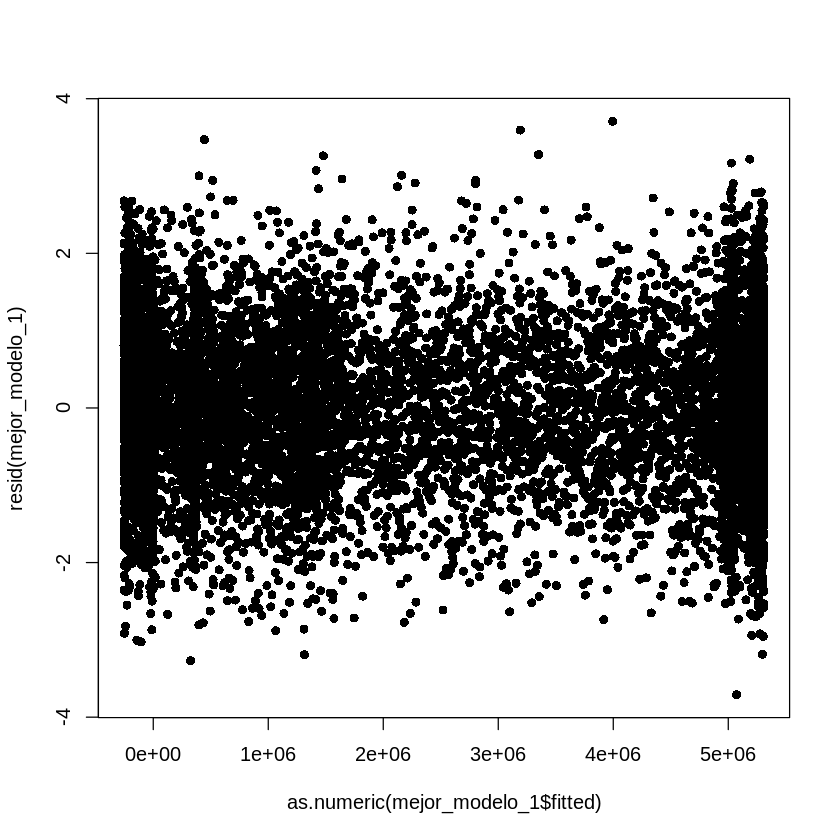

In [ ]:
plot(as.numeric(mejor_modelo_1$fitted),resid(mejor_modelo_1),pch=16,type="p")

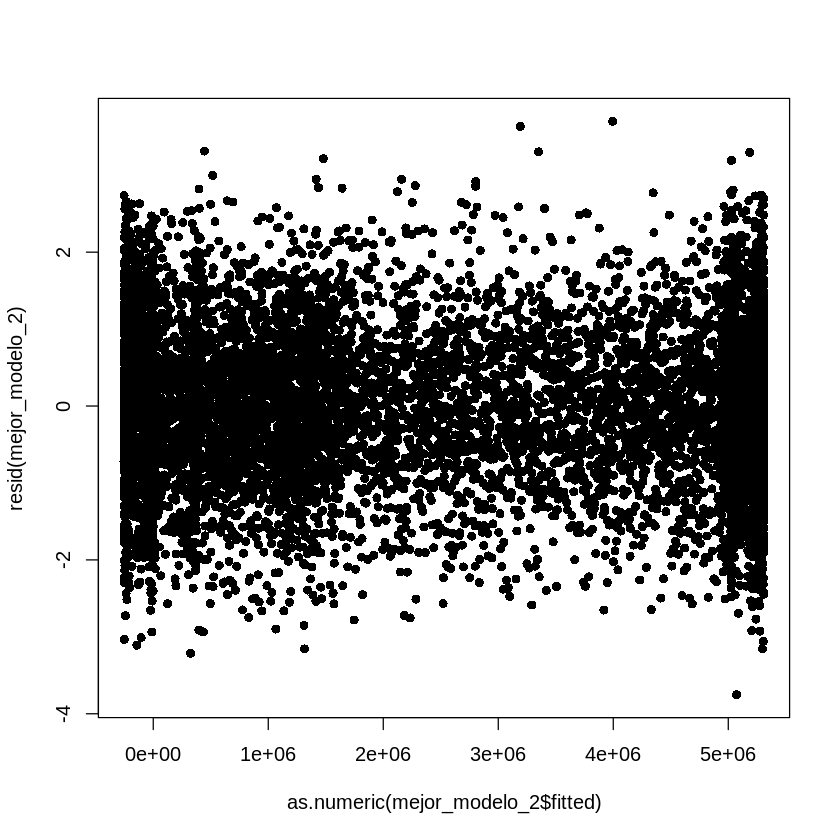

In [ ]:
plot(as.numeric(mejor_modelo_2$fitted),resid(mejor_modelo_2),pch=16,type="p")

In [ ]:
mejor_modelo_2 <-Arima(arima523,order=c(3,2,3))
mejor_modelo_1 <-Arima(arima523,order=c(2,2,3))

In [ ]:
Box.test(mejor_modelo_1$residuals)
Box.test(mejor_modelo_1$residuals,type="Lj")


	Box-Pierce test

data:  mejor_modelo_1$residuals
X-squared = 4.8294, df = 1, p-value = 0.02798



	Box-Ljung test

data:  mejor_modelo_1$residuals
X-squared = 4.8309, df = 1, p-value = 0.02795


In [ ]:
Box.test(mejor_modelo_2$residuals)
Box.test(mejor_modelo_2$residuals,type="Lj")


	Box-Pierce test

data:  mejor_modelo_2$residuals
X-squared = 0.0039239, df = 1, p-value = 0.9501



	Box-Ljung test

data:  mejor_modelo_2$residuals
X-squared = 0.0039251, df = 1, p-value = 0.95


In [ ]:
install.packages("TSA")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’




In [ ]:
library(TSA)

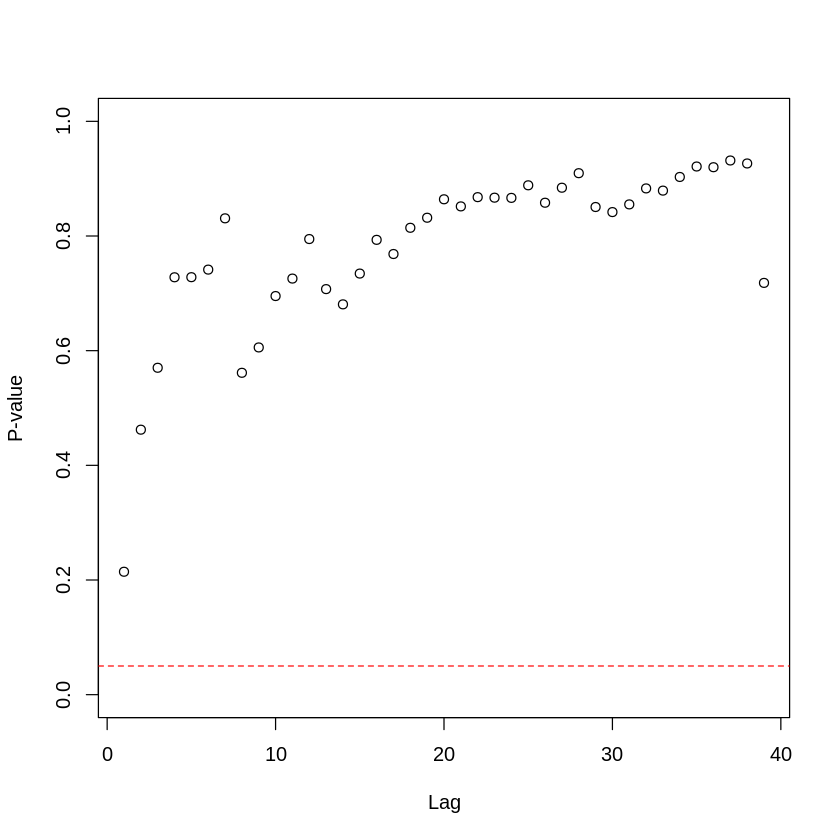

In [ ]:
McLeod.Li.test(mejor_modelo_1,serie_covid)

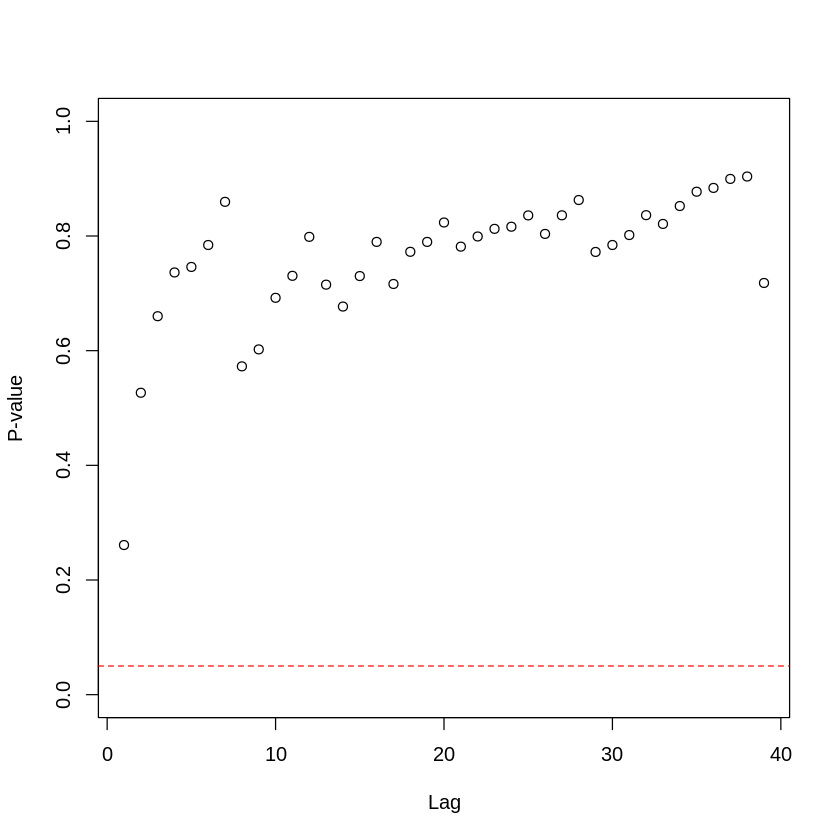

In [ ]:
McLeod.Li.test(mejor_modelo_2,serie_covid)